In [40]:
import pandas as pd
import re
import numpy as np
import random
import matplotlib.pyplot as plt
from transformers import pipeline

In [ ]:
def load_metadata_videos(file_path):
    return pd.read_csv(file_path).drop(columns='Unnamed: 0').dropna()

def bart_classification(text, candidate_labels, multi_label = True, plot=False, title=''):
    classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
    result = classifier(text, candidate_labels, multi_label=multi_label)
    scores, labels = result['scores'], result['labels']
    sorted_pairs = sorted(zip(scores, labels), key=lambda x: x[0], reverse=True)
    scores, labels = zip(*sorted_pairs)

    max_score = scores[0]
    threshold = max_score * 0.9
    top_count = len([i for i, score in enumerate(scores) if score >= threshold])

    if plot: plot_scores(scores, labels, top_count, title)

    if max_score < 0.3: return ["misc"]
    elif top_count == 1: return [labels[0]]
    elif top_count == 2 and multi_label: return [labels[0], labels[1]]
    elif top_count == 3 and multi_label: return [labels[0], labels[1], labels[2]]
    else: return ["uncertain"]


def plot_scores(scores, labels, top_count, title):
    # Define colors: green for the top scores, grey for others
    colors = ['green' if i < top_count else 'grey' for i in range(len(labels))]

    # Map x-axis labels to integers from 1 to len(labels)
    x_positions = range(1, len(labels) + 1)

    # Create a figure with two subplots
    fig, (ax_main, ax_legend) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4, 1]}, figsize=(12, 4))

    # Plot the main bar chart on the first subplot
    bars = ax_main.bar(x_positions, scores, color=colors)

    # Add score labels above each bar
    for bar, score in zip(bars, scores):
        height = bar.get_height()
        ax_main.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,  # Slightly above the bar
            f'{score:.2f}',
            ha='center',
            va='bottom',
            fontsize=10
        )

    # Customize the main subplot
    ax_main.set_title(f'Probability of Each Label for the Video:\n{title}', fontsize=14)
    ax_main.set_xlabel('Label Numbers', fontsize=12)
    ax_main.set_ylabel('Probability', fontsize=12)
    ax_main.set_ylim(0, max(scores) + 0.1)  # Add some space on top for labels
    ax_main.set_xticks(x_positions)  # Use integers on x-axis
    ax_main.grid(axis='y', linestyle='--', alpha=0.7)

    # Set up the legend subplot with small points at (0,0) for each label
    for i, label in enumerate(labels):
        ax_legend.plot(0, 0, 'o', color='white', label=f"{i + 1}: {label}")  # White dot as a placeholder

    # Hide the legend subplot axes and only show the legend
    ax_legend.legend(loc='center', fontsize=9)
    ax_legend.axis('off')

    # Display the plot with tight layout
    plt.tight_layout()
    plt.show()

In [42]:
file_path = r"C:\Users\Flori\Docs\Python\M2_S3_ADA\Project - data\Education_videos_5.csv"
df_education = load_metadata_videos(file_path)

Row: 364772
Title: I Refinished My Bulgarian Makarov Pistol
Tags: Makarov Pistol (Invention),Shooting Sport (Sport),Parkerizing firearms,Parkerizing,Refinnished Makarov,9x18,Makarov


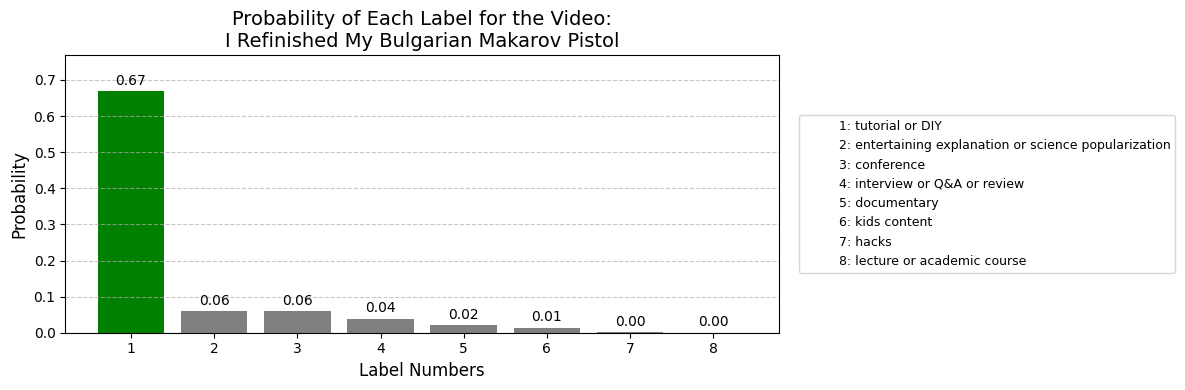

--> Purpose: ['tutorial or DIY']


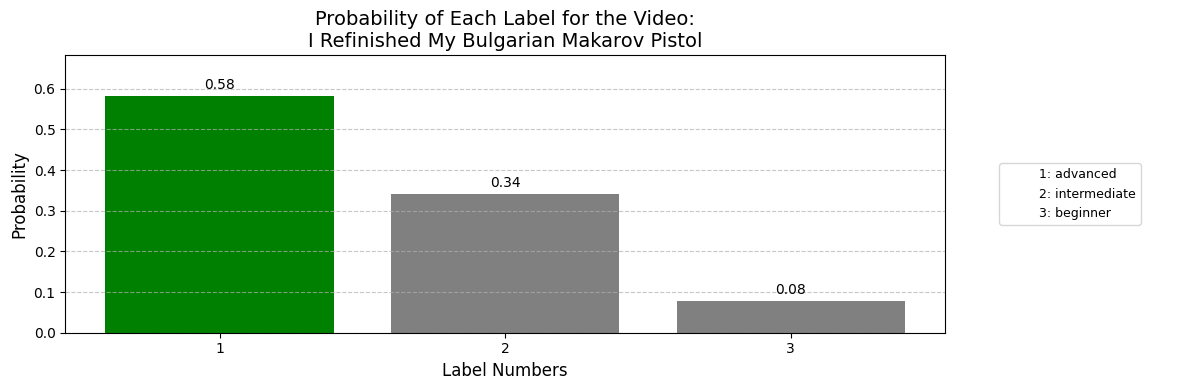

--> Level:   ['advanced']


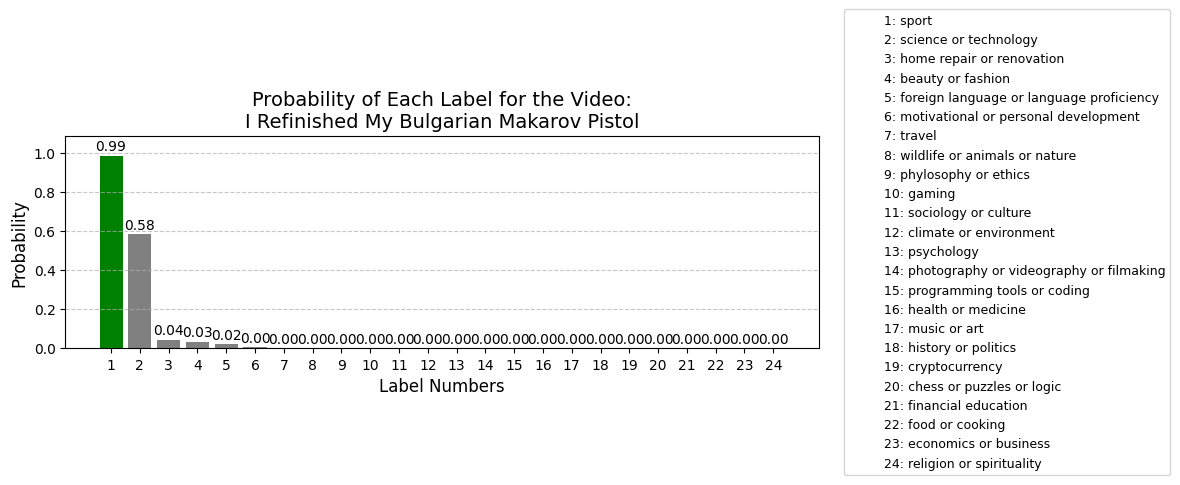

--> Content: ['sport']


In [43]:
purpose_labels = [
    "lecture or academic course", #exercise
    #"study-tips or test preparation",
    "hacks", 
    "conference",
    "tutorial or DIY",
    "interview or Q&A or review", #FIND BETTER
    "kids content",
    "entertaining explanation or science popularization",
    "documentary" #research based
]

level_labels = [
    "beginner",
    "intermediate",
    "advanced",
]

content_labels = [
    "science or technology",
    "music or art",
    "photography or videography or filmaking",
    "gaming",
    "chess or puzzles or logic", #riddles
    "religion or spirituality",
    "phylosophy or ethics",
    "history or politics",
    "economics or business",
    "financial education",
    "cryptocurrency",
    "food or cooking",
    "sport",
    "health or medicine",
    "travel",
    "motivational or personal development",
    "home repair or renovation",  
    "beauty or fashion",
    "programming tools or coding",
    "foreign language or language proficiency",
    "sociology or culture",
    "psychology",
    "climate or environment",
    "wildlife or animals or nature" #segment?
]

# print('################################################')
# random.seed(245676543)
# for i in range(15):
#     row = random.choice(df_education.index.to_list())
#     title = df_education.loc[row, 'title']
#     tags = df_education.loc[row, 'tags']
#     combined_text = f"{title} {tags.replace(',', ', ')}"
#     print('Row:', row)
#     print('Title:', title)
#     print('Tags:', tags)
#     purpose = bart_classification(combined_text, purpose_labels, multi_label=True, plot=True, title=title)
#     print("--> Purpose:", purpose)
#     level = bart_classification(combined_text, level_labels, multi_label=False, plot=True, title=title)
#     print("--> Level:  ", level)
#     content = bart_classification(combined_text, content_labels, multi_label=True, plot=True, title=title)
#     print("--> Content:", content)
#     print('################################################')


row = 364772
title = df_education.loc[row, 'title']
tags = df_education.loc[row, 'tags']
combined_text = f"{title} {tags.replace(',', ', ')}"
print('Row:', row)
print('Title:', title)
print('Tags:', tags)
purpose = bart_classification(combined_text, purpose_labels, multi_label=True, plot=True, title=title)
print("--> Purpose:", purpose)
level = bart_classification(combined_text, level_labels, multi_label=False, plot=True, title=title)
print("--> Level:  ", level)
content = bart_classification(combined_text, content_labels, multi_label=True, plot=True, title=title)
print("--> Content:", content)